# Marco Teórico: Prophet

## 1. Introducción a la predicción de series de tiempo
El análisis y pronóstico de **series temporales** constituye una de las áreas más relevantes en estadística aplicada, econometría y aprendizaje automático.  
Una serie de tiempo se define como un conjunto de observaciones ordenadas cronológicamente, donde el valor presente depende, en mayor o menor medida, de los valores pasados.  

El objetivo principal es **modelar la dinámica temporal** para realizar pronósticos confiables.  

Tradicionalmente, se han empleado modelos estadísticos como **ARIMA**, **SARIMA** o **GARCH**. Sin embargo, estos modelos presentan limitaciones frente a series con **tendencias no lineales**, **estacionalidades complejas** o **cambios estructurales abruptos**.

En este contexto surge **Prophet**, desarrollado por Meta (Facebook, 2017), como un modelo flexible y robusto para el pronóstico de series temporales con aplicaciones en negocios, finanzas, economía y ciencia de datos.

---

## 2. Prophet: Modelo aditivo de descomposición
Prophet se fundamenta en un **modelo aditivo**, que descompone la serie temporal en tres componentes principales:

$$
y(t) = g(t) + s(t) + h(t) + \varepsilon_t
$$

Donde:  
- $g(t)$ = tendencia a largo plazo  
- $s(t)$ = componente estacional (anual, semanal, diaria, etc.)  
- $h(t)$ = efectos de días festivos o eventos especiales  
- $\varepsilon_t$ = término de error o ruido aleatorio  

---

## 3. Componentes del modelo

### 3.1 Tendencia $g(t)$
El crecimiento a largo plazo puede representarse con:
- **Modelo lineal**: crecimiento constante en el tiempo.  
- **Modelo logístico**: crecimiento limitado por una capacidad máxima (*carrying capacity*).  

Ejemplo de tendencia logística:  

$$
g(t) = \frac{C}{1 + \exp(-k(t - m))}
$$  

donde:  
- $C$: capacidad máxima de crecimiento,  
- $k$: tasa de crecimiento,  
- $m$: punto medio de la curva logística.

---

### 3.2 Estacionalidad $s(t)$
Prophet utiliza **series de Fourier** para capturar la estacionalidad.  
Esto le permite modelar patrones recurrentes en distintas escalas temporales: diaria, semanal o anual.  

$$
s(t) = \sum_{n=1}^{N} \left[a_n \cos\left(\frac{2\pi n t}{P}\right) + b_n \sin\left(\frac{2\pi n t}{P}\right)\right]
$$

donde $P$ es el período de la estacionalidad (por ejemplo, 365 para anual, 7 para semanal).

---

### 3.3 Festivos y eventos especiales $h(t)$
Prophet incorpora **efectos externos conocidos** como días festivos, vacaciones o eventos que impactan en la serie.  
Estos se representan como **variables binarias** que capturan el efecto aditivo en torno a esas fechas.

---

### 3.4 Ruido aleatorio $\varepsilon_t$
El error captura la parte **no explicada** por tendencia, estacionalidad o eventos.  
Se asume que sigue una distribución normal:

$$
\varepsilon_t \sim \mathcal{n}(0, \sigma^2)
$$

---

## 4. Ventajas de Prophet
- Manejo automático de **tendencia, estacionalidad y festivos**.  
- Robusto ante **datos faltantes y valores atípicos**.  
- Flexible y escalable a grandes volúmenes de datos.  
- Permite agregar **regresores adicionales** (como rezagos, indicadores macroeconómicos, etc.).  
- Interpretación simple gracias a la **descomposición aditiva**.

---

## 5. Limitaciones de Prophet
- Supone que la serie se explica adecuadamente con un **modelo aditivo**, lo que no siempre es el caso.  
- Requiere un ajuste adecuado de hiperparámetros (ej. `changepoint_prior_scale`).  
- Menos preciso que modelos basados en **deep learning** (LSTM, Transformers) en escenarios altamente no lineales.  

---

## 6. Conclusión
Prophet se ha consolidado como una herramienta práctica y poderosa para el pronóstico de series de tiempo, especialmente en entornos empresariales.  
Su facilidad de uso, capacidad para manejar estacionalidad compleja y la posibilidad de incluir eventos externos lo convierten en una alternativa eficiente frente a los modelos clásicos como ARIMA, y más accesible que métodos de machine learning avanzados.

[*********************100%***********************]  1 of 1 completed
17:55:04 - cmdstanpy - INFO - Chain [1] start processing
17:55:04 - cmdstanpy - INFO - Chain [1] done processing
17:55:05 - cmdstanpy - INFO - Chain [1] start processing


============== EVALUACIÓN EN TEST (precio) ==============
TEST_LEN: 60 días | Fechas 2025-10-28 → 2026-01-23
MSE  : 21278.671818
RMSE : 145.872108


17:55:05 - cmdstanpy - INFO - Chain [1] done processing



============== PRONÓSTICO FUTURO ==============
Horizonte futuro: 100 días

HEAD futuro:
             ds         yhat   yhat_lower   yhat_upper
1004 2026-01-24  2080.430375  1992.261687  2156.961808
1005 2026-01-25  2089.079393  2002.168653  2174.860036
1006 2026-01-26  2215.541372  2125.266035  2296.660873
1007 2026-01-27  2223.253880  2130.371177  2308.020327
1008 2026-01-28  2231.575980  2144.860363  2321.971886

TAIL futuro:
             ds         yhat   yhat_lower   yhat_upper
1099 2026-04-29  3453.743948  2583.161103  4274.973426
1100 2026-04-30  3468.713203  2609.832391  4270.997922
1101 2026-05-01  3485.345274  2589.050973  4321.810550
1102 2026-05-02  3383.560426  2468.474271  4245.680692
1103 2026-05-03  3398.505640  2448.134009  4262.326552


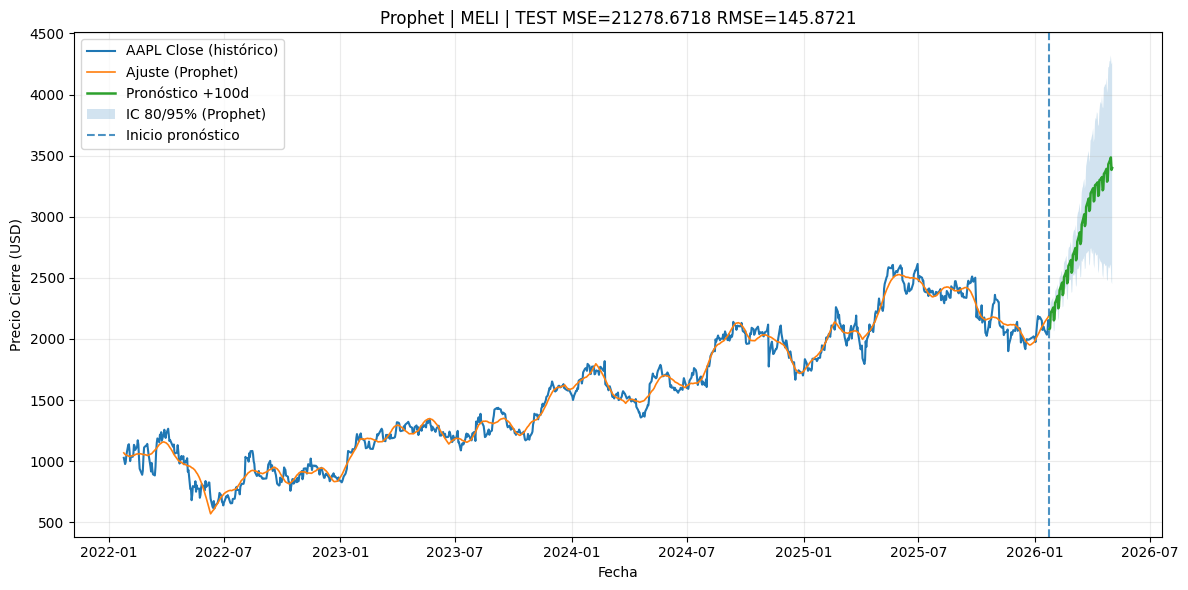

In [9]:
# ============================================================
# Prophet para AAPL: evaluación (MSE/RMSE) + pronóstico futuro
# ============================================================

# !pip install yfinance prophet matplotlib scikit-learn --quiet

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# -----------------------------
# Parámetros
# -----------------------------
TICKER        = "MELI"
PERIOD        = "4y"          # 'max', '1y', '2y', etc.
INTERVAL      = "1d"          # '1d' recomendado para Prophet
TEST_LEN      = 60            # días para evaluar MSE/RMSE (holdout al final)
HORIZON_DAYS  = 100           # horizonte futuro variable (pídelo a voluntad)

# -----------------------------
# 1) Descargar/preparar datos
# -----------------------------
data = yf.download(TICKER, period=PERIOD, interval=INTERVAL, auto_adjust=True)
# multicolumns droplevel
data.columns = data.columns.droplevel(1)


if data.empty:
    raise ValueError("No se descargaron datos. Verifica ticker o intervalo.")

# Usaremos el 'Close' como objetivo
price = data[['Close']].dropna().copy()
price = price.reset_index().rename(columns={"Date": "ds", "Close": "y"})
price['ds'] = pd.to_datetime(price['ds'])  # asegurar tipo datetime

# -----------------------------
# 2) Train/Test split
# -----------------------------
if len(price) <= TEST_LEN + 30:
    # Garantizar suficientes datos para entrenar
    TEST_LEN = max(15, len(price)//5)

train = price.iloc[:-TEST_LEN].copy()
test  = price.iloc[-TEST_LEN:].copy()

# -----------------------------
# 3) Entrenar Prophet (train)
# -----------------------------
m = Prophet(
    daily_seasonality=False,     # activamos daily_seasonality para granularidad diaria
    weekly_seasonality=False,
    yearly_seasonality=True,
    changepoint_prior_scale=1.0 # un poco más flexible; ajusta si sobre/su-ajusta
)
m.fit(train)

# -----------------------------
# 4) Predicción sobre el TEST para métricas
# -----------------------------
# Construimos un "future" que llegue hasta el final del test
last_train_date = train['ds'].max()
last_test_date  = test['ds'].max()
days_needed     = (last_test_date - last_train_date).days

future_eval = m.make_future_dataframe(periods=days_needed, freq="D", include_history=True)
fcst_eval  = m.predict(future_eval)

# Extraer sólo las fechas del test y alinear
pred_test = fcst_eval[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
pred_test = pred_test[pred_test['ds'].isin(test['ds'])].set_index('ds').sort_index()
test_eval = test.set_index('ds').sort_index()

# MSE y RMSE en test (precio)
mse  = mean_squared_error(test_eval['y'], pred_test['yhat'])
rmse = float(np.sqrt(mse))

print("============== EVALUACIÓN EN TEST (precio) ==============")
print(f"TEST_LEN: {TEST_LEN} días | Fechas {test_eval.index.min().date()} → {test_eval.index.max().date()}")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")

# -----------------------------
# 5) Reentrenar con TODO y pronóstico futuro (HORIZON_DAYS)
# -----------------------------
m_full = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=5.0 #Valores recomendados 0.1 0.5 1.0
)
m_full.fit(price)

future = m_full.make_future_dataframe(periods=HORIZON_DAYS, freq="D", include_history=True)
fcst   = m_full.predict(future)

# Separar histórico y futuro
last_date = price['ds'].max()
fcst_hist = fcst[fcst['ds'] <= last_date]
fcst_fut  = fcst[fcst['ds'] >  last_date]

print("\n============== PRONÓSTICO FUTURO ==============")
print(f"Horizonte futuro: {HORIZON_DAYS} días")
print("\nHEAD futuro:")
print(fcst_fut[['ds','yhat','yhat_lower','yhat_upper']].head(5))
print("\nTAIL futuro:")
print(fcst_fut[['ds','yhat','yhat_lower','yhat_upper']].tail(5))

# -----------------------------
# 6) Gráficos (matplotlib)
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(price['ds'], price['y'], label="AAPL Close (histórico)", linewidth=1.5)
plt.plot(fcst_hist['ds'], fcst_hist['yhat'], label="Ajuste (Prophet)", linewidth=1.2)
plt.plot(fcst_fut['ds'], fcst_fut['yhat'], label=f"Pronóstico +{HORIZON_DAYS}d", linewidth=1.8)

# Bandas de confianza en el futuro
plt.fill_between(fcst_fut['ds'].values,
                 fcst_fut['yhat_lower'].values,
                 fcst_fut['yhat_upper'].values,
                 alpha=0.2, label="IC 80/95% (Prophet)")

plt.axvline(x=last_date, linestyle="--", alpha=0.8, label="Inicio pronóstico")
plt.title(f"Prophet | {TICKER} | TEST MSE={mse:.4f} RMSE={rmse:.4f}")
plt.xlabel("Fecha")
plt.ylabel("Precio Cierre (USD)")
plt.legend()
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

In [10]:
dos_porciento = round(fcst_fut['yhat'].iloc[-1] * 0.02, 3)
cinco_porciento = round(fcst_fut['yhat'].iloc[-1] * 0.05, 3)
rmse_ = round(rmse,3)
print(f"2%: ${dos_porciento}, 5%: ${cinco_porciento}, RMSE: ${rmse_}")
#<2% muy bueno
#2%-5% aceptable
#5% demasiado error, no es buen predictor

2%: $67.97, 5%: $169.925, RMSE: $145.872


## Versión Lags

## Preparar los datos y el modelo

### Subtarea:
Cargar los datos, crear rezagos, dividir los datos y entrenar el modelo Prophet con regresores.

**Razonamiento**:  
El primer paso es descargar y preparar los datos, lo que incluye la creación de variables rezagadas (*lag features*) y la división del conjunto en datos de entrenamiento y prueba.  
Esto corresponde a los pasos del 1 al 6 de las instrucciones.



In [11]:
# -----------------------------
# Parámetros
# -----------------------------
TICKER        = TICKER
PERIOD        = "5y"
INTERVAL      = "1d"
TEST_LEN      = 60
HORIZON_DAYS  = 100
NUM_LAGS      = 20   # número de rezagos (Close + 20 rezagos)

# -----------------------------
# 1) Descargar y preparar datos
# -----------------------------
data = yf.download(TICKER, period=PERIOD, interval=INTERVAL, auto_adjust=True)
data.columns = data.columns.droplevel(1)

if data.empty:
    raise ValueError("No se descargaron datos. Verifica ticker o intervalo.")

price = data[['Close']].dropna().copy()
price = price.reset_index().rename(columns={"Date": "ds", "Close": "y"})
price['ds'] = pd.to_datetime(price['ds'])

# -----------------------------
# 2) Crear lags
# -----------------------------
for lag in range(1, NUM_LAGS+1): #20 rezagos mas la columna close.
    price[f"lag_{lag}"] = price['y'].shift(lag) #shift: recorrer un dia de cotizacion

# Eliminar NaN por los lags
price = price.dropna().reset_index(drop=True)

# -----------------------------
# 3) Train/Test split
# -----------------------------
if len(price) <= TEST_LEN + 30:
    TEST_LEN = max(15, len(price)//5)

train = price.iloc[:-TEST_LEN].copy()
test  = price.iloc[-TEST_LEN:].copy()

[*********************100%***********************]  1 of 1 completed


**Razonamiento**:  
Ahora que los datos están preparados y divididos, el siguiente paso es instanciar el modelo Prophet y agregar las variables rezagadas (*lag features*) como regresores, para luego ajustar el modelo con los datos de entrenamiento.  
Esto corresponde a los pasos 7, 8 y 9 de las instrucciones.



In [12]:
# -----------------------------
# 4) Entrenar Prophet con regresores
# -----------------------------
m = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.5
)

# Agregar los 20 lags como regresores
for lag in range(1, NUM_LAGS+1):
    m.add_regressor(f"lag_{lag}")

m.fit(train)

17:55:06 - cmdstanpy - INFO - Chain [1] start processing
17:55:07 - cmdstanpy - INFO - Chain [1] done processing


## Configuración de la predicción iterativa

### Subtarea:
Inicializar un DataFrame para almacenar las predicciones futuras y preparar el último dato conocido para comenzar el proceso iterativo.


**Razonamiento**:  
Inicializar un DataFrame para las predicciones futuras y preparar la última ventana de datos para la predicción iterativa, creando un DataFrame con las fechas futuras y otro con las últimas `NUM_LAGS` filas de los datos históricos.



In [13]:
# -----------------------------
# 5) Preparar para pronóstico futuro iterativo
# -----------------------------
# 1. Create a new DataFrame called `future_predictions` with a single column named 'ds' and populate it with future dates for the specified `HORIZON_DAYS` frequency, starting from the day after the last date in the `price` DataFrame.
last_date = price['ds'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=HORIZON_DAYS, freq="D")
future_predictions = pd.DataFrame({'ds': future_dates})

# 2. Select the last `NUM_LAGS` rows from the `price` DataFrame, keeping all columns, and store this subset in a new DataFrame called `last_data_window`.
last_data_window = price.tail(NUM_LAGS).copy()

display(future_predictions.head())
display(last_data_window.head())

,ds
0,2026-01-24
1,2026-01-25
2,2026-01-26
3,2026-01-27
4,2026-01-28


Price,ds,y,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20
1216,2025-12-24,1998.209961,1995.069946,1993.650024,1997.609985,1964.459961,1916.280029,1933.719971,1966.760010,2015.890015,...,2074.479980,2088.360107,2066.419922,2139.560059,2119.830078,2115.909912,2064.550049,2071.780029,2033.319946,2055.000000
1217,2025-12-26,2005.709961,1998.209961,1995.069946,1993.650024,1997.609985,1964.459961,1916.280029,1933.719971,1966.760010,...,1970.729980,2074.479980,2088.360107,2066.419922,2139.560059,2119.830078,2115.909912,2064.550049,2071.780029,2033.319946
1218,2025-12-29,2014.969971,2005.709961,1998.209961,1995.069946,1993.650024,1997.609985,1964.459961,1916.280029,1933.719971,...,2019.810059,1970.729980,2074.479980,2088.360107,2066.419922,2139.560059,2119.830078,2115.909912,2064.550049,2071.780029
1219,2025-12-30,2020.880005,2014.969971,2005.709961,1998.209961,1995.069946,1993.650024,1997.609985,1964.459961,1916.280029,...,2015.890015,2019.810059,1970.729980,2074.479980,2088.360107,2066.419922,2139.560059,2119.830078,2115.909912,2064.550049
1220,2025-12-31,2014.260010,2020.880005,2014.969971,2005.709961,1998.209961,1995.069946,1993.650024,1997.609985,1964.459961,...,1966.760010,2015.890015,2019.810059,1970.729980,2074.479980,2088.360107,2066.419922,2139.560059,2119.830078,2115.909912


**Razonamiento**:  

Realizar la predicción futura de manera iterativa, actualizando la `last_data_window` con cada nueva predicción para generar los rezagos necesarios en el siguiente paso de pronóstico.  
Almacenar las predicciones en el DataFrame `future_predictions`.

In [14]:
# -----------------------------
# 6) Pronóstico futuro iterativo
# -----------------------------
# Iterative forecasting loop
for i in range(HORIZON_DAYS):
    # Get the date to predict
    future_date = future_predictions.loc[i, 'ds']

    # Prepare the input for Prophet prediction for the current date
    # This requires the last NUM_LAGS actual/predicted values
    current_predict_df = pd.DataFrame({'ds': [future_date]})

    # Add the lagged features from the last_data_window
    for lag in range(1, NUM_LAGS + 1):
        current_predict_df[f'lag_{lag}'] = last_data_window.iloc[-lag]['y']

    # Predict the next value
    forecast = m_full.predict(current_predict_df)
    predicted_value = forecast['yhat'].iloc[0]
    yhat_lower = forecast['yhat_lower'].iloc[0]
    yhat_upper = forecast['yhat_upper'].iloc[0]

    # Store the prediction
    future_predictions.loc[i, 'yhat'] = predicted_value
    future_predictions.loc[i, 'yhat_lower'] = yhat_lower
    future_predictions.loc[i, 'yhat_upper'] = yhat_upper


    # Update last_data_window with the new prediction to generate lags for the next iteration
    new_row = pd.DataFrame({'ds': [future_date], 'y': [predicted_value]})
    for lag in range(1, NUM_LAGS + 1):
         new_row[f'lag_{lag}'] = last_data_window.iloc[-lag]['y']

    last_data_window = pd.concat([last_data_window, new_row], ignore_index=True).tail(NUM_LAGS)

display(future_predictions.head())
display(future_predictions.tail())

,ds,yhat,yhat_lower,yhat_upper
0,2026-01-24,2080.430375,1999.949151,2165.468205
1,2026-01-25,2089.079393,1999.127045,2174.210381
2,2026-01-26,2215.541372,2128.451697,2298.727610
3,2026-01-27,2223.253880,2129.430923,2307.468977
4,2026-01-28,2231.575980,2143.212242,2322.605769


,ds,yhat,yhat_lower,yhat_upper
95,2026-04-29,3453.743948,3358.323536,3542.603610
96,2026-04-30,3468.713203,3383.764419,3550.251688
97,2026-05-01,3485.345274,3400.644323,3573.258145
98,2026-05-02,3383.560426,3300.793513,3470.997667
99,2026-05-03,3398.505640,3306.268597,3486.432895


**Razonamiento**:  
Combinar los datos históricos con las predicciones futuras para la visualización y luego generar la gráfica que muestre los datos históricos, el ajuste del modelo y el pronóstico iterativo futuro con los intervalos de confianza.



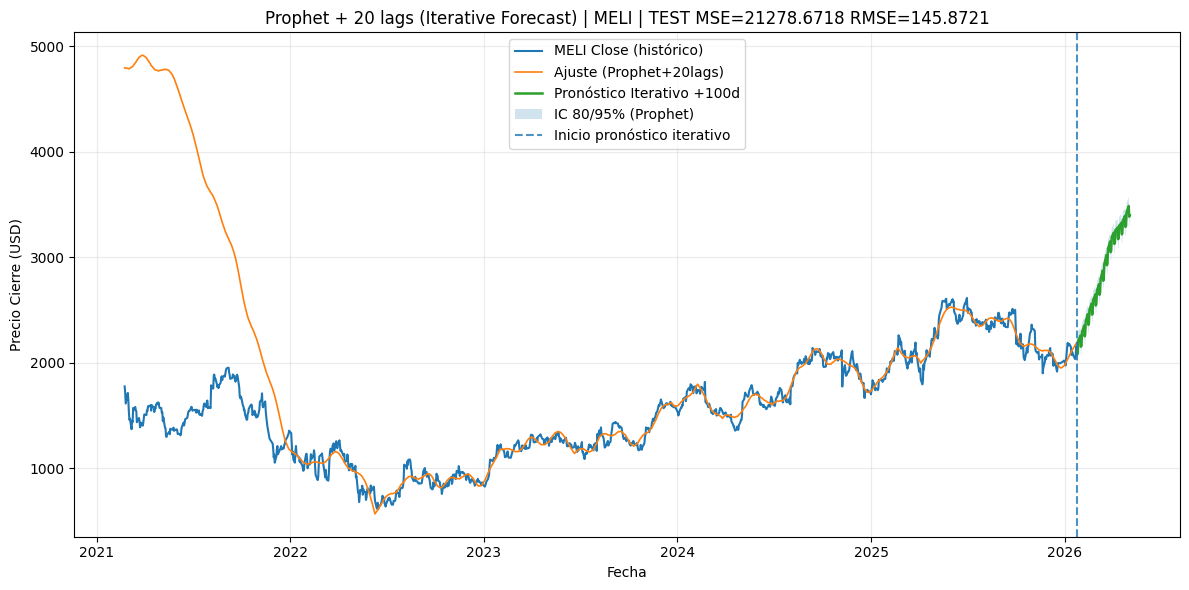

In [17]:
# -----------------------------
# 7) Combinar histórico y futuro para gráfico
# -----------------------------
# Rename columns in future_predictions to match fcst format for plotting
future_predictions = future_predictions.rename(columns={'yhat': 'yhat', 'yhat_lower': 'yhat_lower', 'yhat_upper': 'yhat_upper'})

# Combine historical data (price) and future predictions (future_predictions) for plotting
# Ensure 'ds' is datetime in both dataframes
price['ds'] = pd.to_datetime(price['ds'])
future_predictions['ds'] = pd.to_datetime(future_predictions['ds'])

# The historical data already contains the lags, we only need 'ds' and 'y' for plotting the historical line
price_for_plot = price[['ds', 'y']]

# For the fitted line on historical data, we need to predict on the historical data itself using the refitted model
# We can reuse the fcst_hist from the previous cell if it's available and correctly calculated,
# otherwise, we would need to predict on the historical data again. Assuming fcst_hist is available and correct.
# If not, we would do:
# fcst_hist = m_full.predict(price.drop(columns=[f"lag_{i}" for i in range(1, NUM_LAGS+1)])) # This would fail due to missing lags
# A correct way would be to predict on the price dataframe which already has lags
fcst_hist = m_full.predict(price)

# -----------------------------
# 8) Gráficos (matplotlib)
# -----------------------------
plt.figure(figsize=(12,6))

# Plot historical data
plt.plot(price_for_plot['ds'], price_for_plot['y'], label=f"{TICKER} Close (histórico)", linewidth=1.5)

# Plot fitted values on historical data
plt.plot(fcst_hist['ds'], fcst_hist['yhat'], label="Ajuste (Prophet+20lags)", linewidth=1.2)

# Plot future forecast
plt.plot(future_predictions['ds'], future_predictions['yhat'], label=f"Pronóstico Iterativo +{HORIZON_DAYS}d", linewidth=1.8)

# Bandas de confianza en el futuro
plt.fill_between(future_predictions['ds'].values,
                 future_predictions['yhat_lower'].values,
                 future_predictions['yhat_upper'].values,
                 alpha=0.2, label="IC 80/95% (Prophet)")

# Add a vertical line at the start of the forecast
last_date = price['ds'].max()
plt.axvline(x=last_date, linestyle="--", alpha=0.8, label="Inicio pronóstico iterativo")

plt.title(f"Prophet + {NUM_LAGS} lags (Iterative Forecast) | {TICKER} | TEST MSE={mse:.4f} RMSE={rmse:.4f}")
plt.xlabel("Fecha")
plt.ylabel("Precio Cierre (USD)")
plt.legend()
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

In [16]:
dos_porciento = round(future_predictions['yhat'].iloc[-1] * 0.02, 3)
cinco_porciento = round(future_predictions['yhat'].iloc[-1] * 0.05, 3)
rmse_ = round(rmse,3)
print(f"2%: ${dos_porciento}, 5%: ${cinco_porciento}, RMSE: ${rmse_}")
#<2% muy bueno
#2%-5% aceptable
#5% demasiado error, no es buen predictor

2%: $67.97, 5%: $169.925, RMSE: $145.872


## Resumen:

### Hallazgos clave del análisis de datos

*   El modelo Prophet con 20 regresores rezagados fue entrenado exitosamente con los datos históricos.  
*   Se implementó un proceso de predicción iterativa, en el cual cada predicción futura se utilizó para generar las variables rezagadas necesarias en la predicción siguiente.  
*   El proceso de predicción iterativa generó proyecciones futuras para el horizonte especificado, incluyendo intervalos de confianza.  
*   La visualización combinó de manera efectiva los datos históricos, el ajuste del modelo sobre los datos históricos y el pronóstico iterativo futuro con intervalos de confianza, proporcionando una visión integral del desempeño y las predicciones del modelo.  

### Perspectivas o próximos pasos

*   El enfoque de predicción iterativa permite que el modelo aproveche sus propias predicciones como insumos para pasos futuros, lo cual puede ser crucial en series de tiempo donde la historia reciente influye fuertemente en los valores futuros.  
*   Evaluar el desempeño del pronóstico iterativo contra los valores reales (si están disponibles para el período proyectado) sería un siguiente paso valioso para medir la precisión del modelo.  